In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root="./data", train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)


100%|██████████| 9.91M/9.91M [00:05<00:00, 1.74MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 141kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.12MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.82MB/s]


In [6]:
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)

In [7]:
device = "mps"
model = DNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [8]:
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

Epoch [1/5], Loss: 0.3614
Epoch [2/5], Loss: 0.1558
Epoch [3/5], Loss: 0.1175
Epoch [4/5], Loss: 0.0975
Epoch [5/5], Loss: 0.0821


In [9]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 97.27%


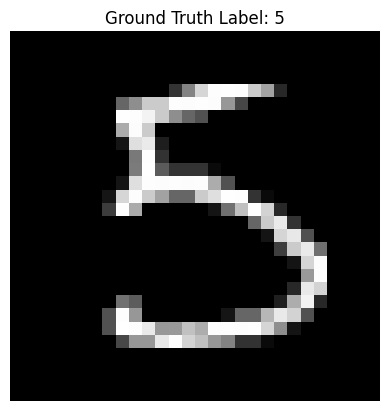

Predicted Label: 5
Confidence: 0.9740


In [ ]:
index = 15

image, label = test_dataset[index]

# 顯示原圖
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Ground Truth Label: {label}")
plt.axis('off')
plt.show()

# 模型預測
model.eval()
with torch.no_grad():
    image_tensor = image.unsqueeze(0).to(device)  # 加上 batch 維度
    output = model(image_tensor)
    probs = F.softmax(output, dim=1)
    pred_label = torch.argmax(probs, dim=1).item()
    confidence = probs[0][pred_label].item()

# 顯示預測結果
print(f"Predicted Label: {pred_label}")
print(f"Confidence: {confidence:.4f}")
